## 연관규칙
- 'A가 발생하면 B도 발생하더라'라는 형태의 규칙으로, 트랜잭션 데이터를 탐색하는데 사용
  - A : 부모 아이템 집합(antecedent)
  - B : 자식 아이템 집합(consequent)
  - A와 B는 모두 공집합이 아닌 집합이며, A ∩ B = Φ을 만족함(즉, 공통되는 요소가 없음)
  
- 규칙예시
  - 분야: 마트, 규칙 : {맥주, 종이컵} -> {땅콩}, 해석: 맥주와 종이컵을 구매하면, 땅콩도 구매하더라, 활용 예시 : 맥주, 종이컵, 땅콩을 한 공간에 배치하자

## 연관규칙의 평가 척도
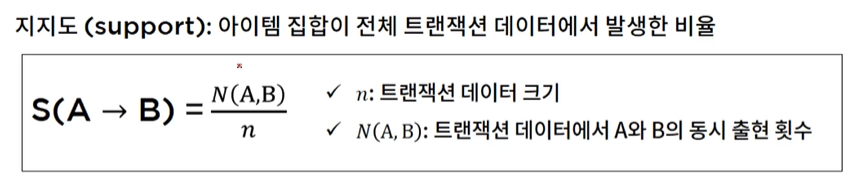

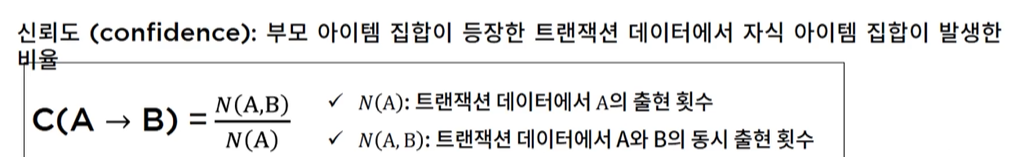

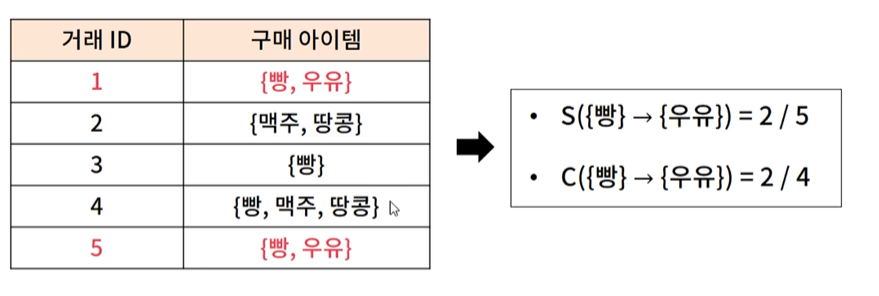

## 관련모듈 : mlxtend
- apriori 함수를 이용한 빈발 아이템 집합 탐색과 association_rules 함수를 이용하여 연관규칙을 탐색하는 두 단계로 수행
- mlxtend.frequent_patterns.apriori(df, min_support):
  - df : one hot encoding 형태의 데이터 프레임
  - min_support : 최소 지지도
- mlxtend.frequent_patterns.association_rules(frequent_dataset, metric, mimn_threshold):
  - frequent_dataset에서 찾은 연관 규칙을 데이터 프레임 형태로 반환
  - metric: 연관규칙을 필터링하기 위한 유용성 척도(default: confidence)
  - min_threshold: 지정한 metric의 최소 기준치

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [2]:
df = pd.read_csv('Instacart Market Basket Analysis.csv')
df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [3]:
df['product_id'].value_counts(normalize = True).head(100)

24852    0.013524
13176    0.011180
21137    0.007868
21903    0.007066
47626    0.005875
           ...   
8193     0.001024
9387     0.000996
37687    0.000984
20995    0.000983
34243    0.000976
Name: product_id, Length: 100, dtype: float64

In [4]:
product_list_per_order = df.groupby('order_id')['product_id'].apply(list)

In [5]:
# 구매 기록 데이터 -> One hot encoding 데이터
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder() #인스턴스화
one_hot_df = encoder.fit(product_list_per_order).transform(product_list_per_order) # 결과 : ndarray
one_hot_df = pd.DataFrame(one_hot_df, columns = encoder.columns_)
one_hot_df.head() # 매우 희소(sparse)

,1,2,3,4,5,7,8,9,10,11,...,49677,49678,49679,49680,49681,49682,49683,49686,49687,49688
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from mlxtend.frequent_patterns import *
frequent_item_df = apriori(one_hot_df, min_support = 0.003) # 0.3% 이상 구매한 상품만 대상으로 함
result = association_rules(frequent_item_df, metric = 'confidence', min_threshold = 0.1)
result[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by = 'confidence', ascending = False).to_csv("연관규칙탐사결과.csv", index = False)

In [7]:
result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12022),(1815),0.014206,0.008887,0.003018,0.212446,23.906409,0.002892,1.258471
1,(1815),(12022),0.008887,0.014206,0.003018,0.339623,23.906409,0.002892,1.492773
2,(3640),(17300),0.028672,0.074568,0.004146,0.144604,1.939221,0.002008,1.081875
3,(3640),(19574),0.028672,0.142719,0.008163,0.284689,1.994754,0.004071,1.198473
4,(3640),(20648),0.028672,0.045980,0.003780,0.131845,2.867432,0.002462,1.098905


In [8]:
product_list_per_order

order_id
1          [49302, 11109, 10246, 49683, 43633, 13176, 472...
36         [39612, 19660, 49235, 43086, 46620, 34497, 486...
38         [11913, 18159, 4461, 21616, 23622, 32433, 2884...
96         [20574, 30391, 40706, 25610, 27966, 24489, 39275]
98         [8859, 19731, 43654, 13176, 4357, 37664, 34065...
                                 ...                        
3421049           [40800, 17706, 33424, 17299, 26800, 34243]
3421056                    [5750, 9340, 21709, 16475, 12432]
3421058    [15629, 4347, 34466, 6244, 6858, 30316, 35578,...
3421063                         [49235, 13565, 14233, 35548]
3421070                                 [35951, 16953, 4724]
Name: product_id, Length: 131209, dtype: object